In [66]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import random

from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid


import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp

from Data import Data
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

import Rung as rung

from pandas_datareader import wb

import seaborn as sns


import seaborn as sns
import feature_finder_keiko as ff
import feature_finder_f as ff1

from scipy import signal

plt.rcParams["figure.figsize"] = (20,10)
import calendar

In [81]:
train_start = 1976
validation_end = 2010

n_components_sst = 57
f = 12
tau = 1
cc = 'ZA'
ccc = 'ZA'
N = 475

In [82]:
temporal_limits = {"time_min":datetime(train_start, 1, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}
original_count, count = ff.drought_timeseries("{}_gamma_18912015_{}.npy".format(cc,f),train_start,validation_end)
data_sst, ts, V, df_sst, avg, std = ff.PCA_computer_rotated('../../../nc/sst.mnmean.nc', "sst",temporal_limits, n_components_sst, -9.96921e+36)

/home/mathsys2/Files/Time_Series/Climate_Network/Causality/TimeSeries/notebooks/whole_data_validation/feature_finder_keiko.py:126: RuntimeWarning: invalid value encountered in less_equal
  count.append(np.count_nonzero(ET_gamma[i,:] <= extremes_treshold))


In [83]:
test_start = 2011
test_end = 2015

temporal_limits = {"time_min":datetime(test_start, 1, 1, 0, 0),"time_max":datetime(test_end, 12, 1, 0, 0)}
data_sst = ff.data_generator_avg_std('../../../nc/sst.mnmean.nc', "sst",temporal_limits, avg, std, 12, -9.96921e+36)
original_count_test, count_test = ff.drought_timeseries("{}_gamma_18912015_{}.npy".format(cc,f),test_start,test_end)

count = original_count_test.copy()

/home/mathsys2/Files/Time_Series/Climate_Network/Causality/TimeSeries/notebooks/whole_data_validation/feature_finder_keiko.py:126: RuntimeWarning: invalid value encountered in less_equal
  count.append(np.count_nonzero(ET_gamma[i,:] <= extremes_treshold))


In [84]:
result = np.zeros((12,12))
for tau in np.arange(1,13):
    start_lag = tau
    end_lag = tau + 11
    link = np.load("../../whole_data_results/{}/best_link/corr_{}_{}_{}_{}_{}.npy".format(ccc,f,train_start,validation_end,tau,n_components_sst))
    df = pd.DataFrame({"drought":count})
    lags = np.arange(start_lag,end_lag + 1)
    df = df.assign(**{
    '{} (t-{})'.format(col, t): df[col].shift(t)
    for t in lags
    for col in df
    })
    for k in range(len(link)):
        df_sst["pc"] = V[:,link[k,0]-1]
        df[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst)
        df[str(k)] = df[str(k)].shift(abs(link[k,1]))
    df = df.dropna()
    
    pred = np.load("../../whole_data_results/{}/corr_data/pred_{}_{}_{}_{}_{}.npy".format(ccc,f,test_start,test_end,tau,n_components_sst))
    test = np.load("../../whole_data_results/{}/corr_data/test_{}_{}_{}_{}_{}.npy".format(ccc,f,test_start,test_end,tau,n_components_sst))
    
    for i in range(12):
        I = np.where(df.index%12 ==i)[0]
        result[tau - 1, i] = mean_squared_error(test[I],pred[I])

In [85]:
result = np.sqrt(result)/N

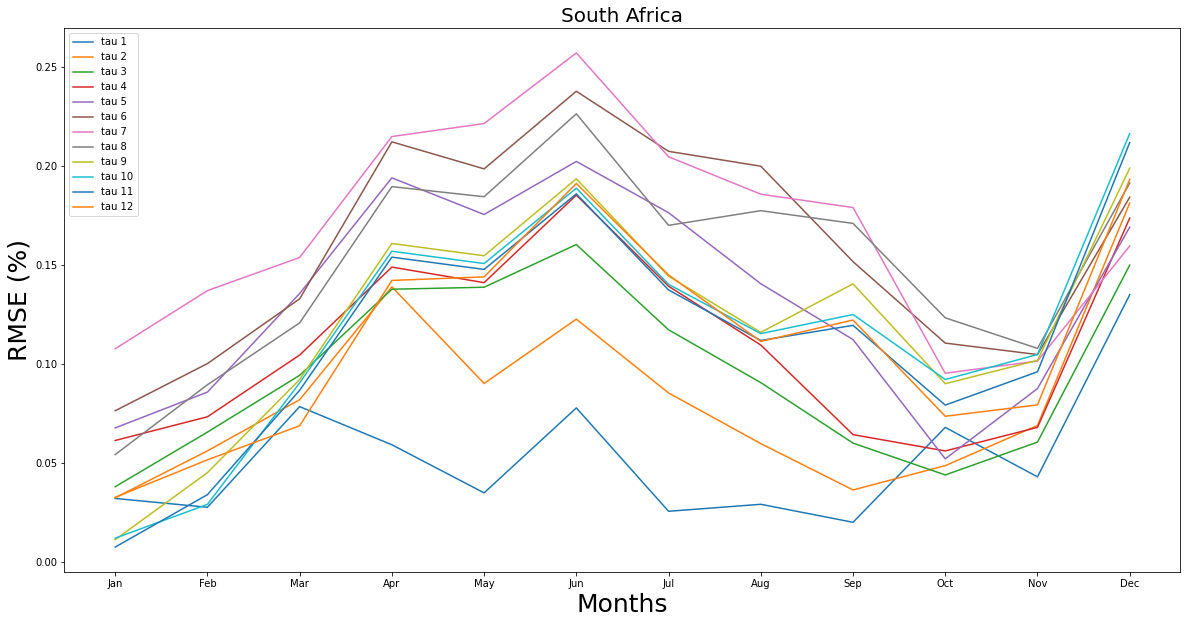

In [86]:
cal_name = []
for i in range(1,13):
    cal_name.append(list(enumerate(calendar.month_abbr))[i][1])

for i in range(12):
    plt.plot(cal_name,result[i,:], label = "tau {}".format(i+1))

plt.xlabel("Months",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.title("South Africa", fontsize = 20)
plt.legend()
plt.savefig("{}_months_corr.png".format(cc))

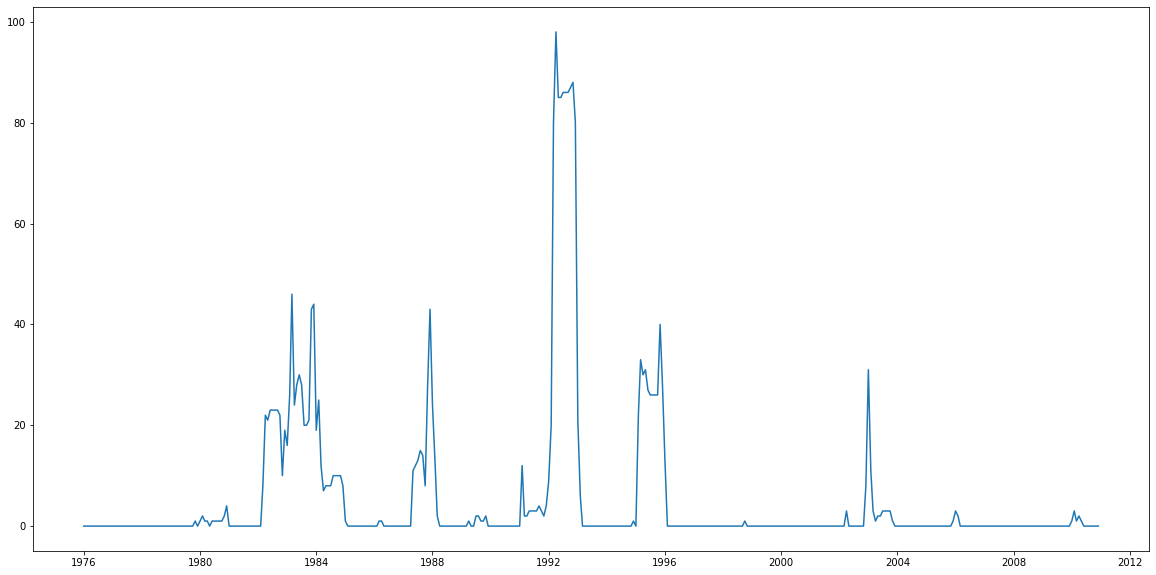

In [250]:
x = np.arange('1976-01', '2011-01', dtype='datetime64[M]')
plt.plot(x,original_count)

In [5]:
d  = np.load("ZW_gamma_18912015_12.npy")

In [7]:
test_start = 2011
test_end = 2015

In [8]:
temporal_limits = {"time_min":datetime(test_start, 1, 1, 0, 0),"time_max":datetime(test_end, 12, 1, 0, 0)}
data_sst = ff.data_generator_avg_std('../../../nc/sst.mnmean.nc', "sst",temporal_limits, avg, std, 12, -9.96921e+36)
original_count_test, count_test = ff.drought_timeseries("{}_gamma_18912015_{}.npy".format(cc,f),test_start,test_end)

NameError: name 'avg' is not defined

In [8]:
count = original_count_test.copy()

In [9]:
start_lag = tau
end_lag = tau + 11

In [256]:
link = np.load("../../whole_data_results/ET_orac/best_link/pcmci_{}_{}_{}_{}_{}.npy".format(f,train_start,validation_end,tau,n_components_sst))

In [2]:
result = np.zeros((12,12))
for tau in np.arange(1,13):
    start_lag = tau
    end_lag = tau + 11
    link = np.load("../../whole_data_results/ZW/best_link/pcmci_{}_{}_{}_{}_{}.npy".format(f,train_start,validation_end,tau,n_components_sst))
    df = pd.DataFrame({"drought":count})
    lags = np.arange(start_lag,end_lag + 1)
    df = df.assign(**{
    '{} (t-{})'.format(col, t): df[col].shift(t)
    for t in lags
    for col in df
    })
    for k in range(len(link)):
        df_sst["pc"] = V[:,link[k,0]-1]
        df[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst)
        df[str(k)] = df[str(k)].shift(abs(link[k,1]))
    df = df.dropna()
    
    pred = np.load("../../whole_data_results/ZW/pcmci_data/pred_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
    test = np.load("../../whole_data_results/ZW/pcmci_data/test_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
    
    for i in range(12):
        I = np.where(df.index%12 ==i)[0]
        result[tau - 1, i] = mean_squared_error(test[I],pred[I])

NameError: name 'f' is not defined

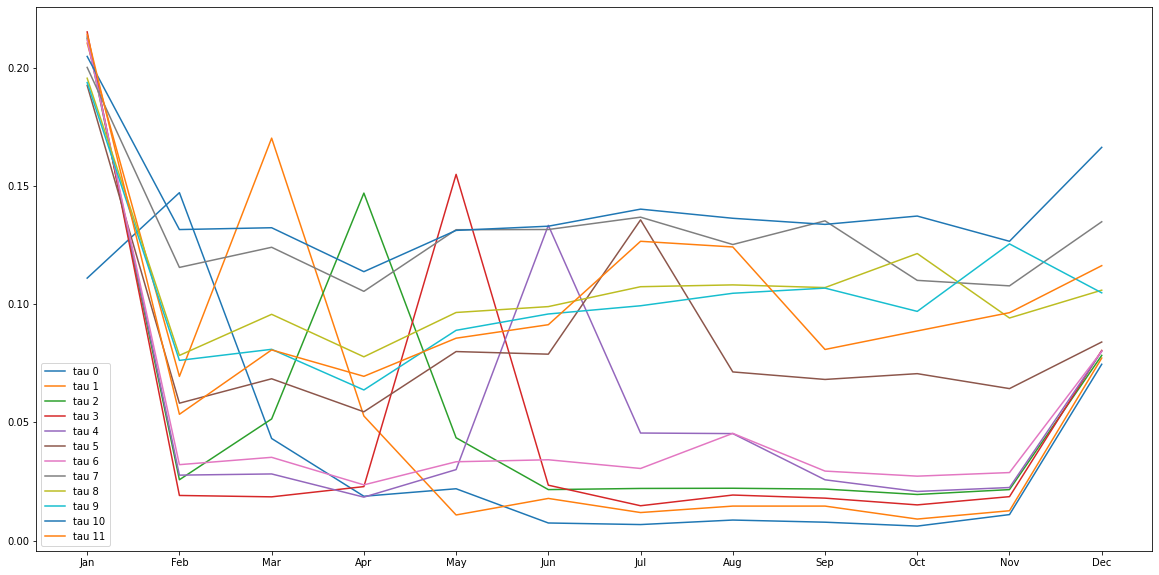

In [15]:
result = np.sqrt(result)/175

cal_name = []
for i in range(1,13):
    cal_name.append(list(enumerate(calendar.month_abbr))[i][1])

for i in range(12):
    plt.plot(cal_name,result[i,:], label = "tau {}".format(i))
    
plt.legend()

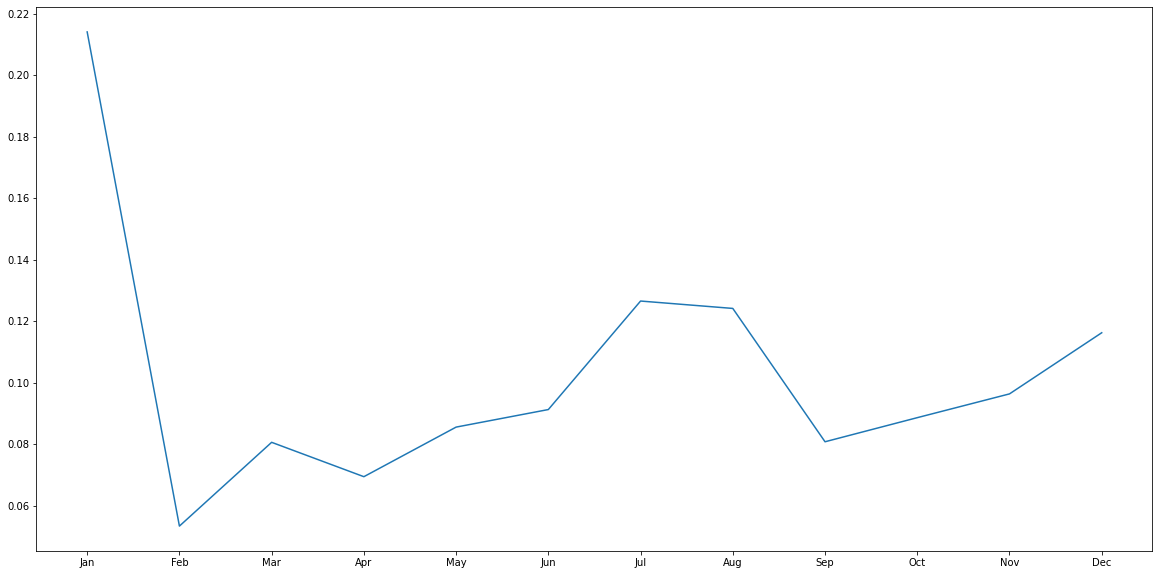

In [16]:
plt.plot(cal_name,result[11,:], label = "tau {}".format(11))

In [274]:
result = np.zeros((12,12))
for tau in np.arange(1,13):
    start_lag = tau
    end_lag = tau + 11
    link = np.load("../../whole_data_results/ZA/best_link/pcmci_{}_{}_{}_{}_{}.npy".format(f,train_start,validation_end,tau,n_components_sst))
    df = pd.DataFrame({"drought":count})
    lags = np.arange(start_lag,end_lag + 1)
    df = df.assign(**{
    '{} (t-{})'.format(col, t): df[col].shift(t)
    for t in lags
    for col in df
    })
    for k in range(len(link)):
        df_sst["pc"] = V[:,link[k,0]-1]
        df[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst)
        df[str(k)] = df[str(k)].shift(abs(link[k,1]))
    df = df.dropna()
    
    pred = np.load("../../whole_data_results/ZA/pcmci_data/pred_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
    test = np.load("../../whole_data_results/ZA/pcmci_data/test_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
    
    for i in range(12):
        I = np.where(df.index%12 ==i)[0]
        result[tau - 1, i] = mean_squared_error(test[I],pred[I])

In [262]:
result = np.sqrt(result)/145

In [275]:
import calendar
cal_name = []
for i in range(1,13):
    cal_name.append(list(enumerate(calendar.month_abbr))[i][1])

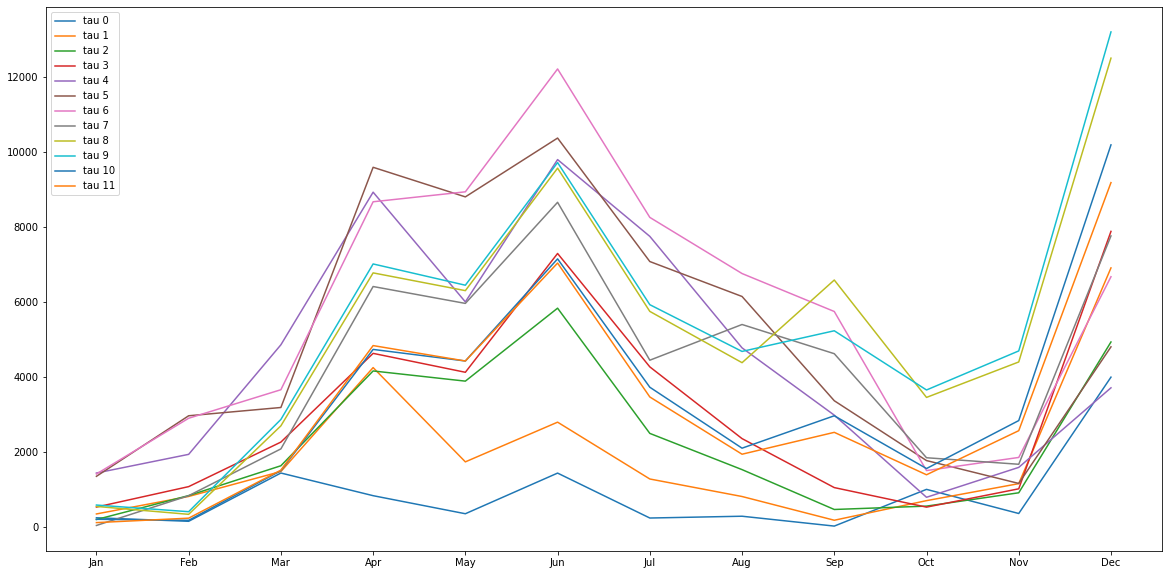

In [276]:
for i in range(12):
    plt.plot(cal_name,result[i,:], label = "tau {}".format(i))
    
plt.legend()

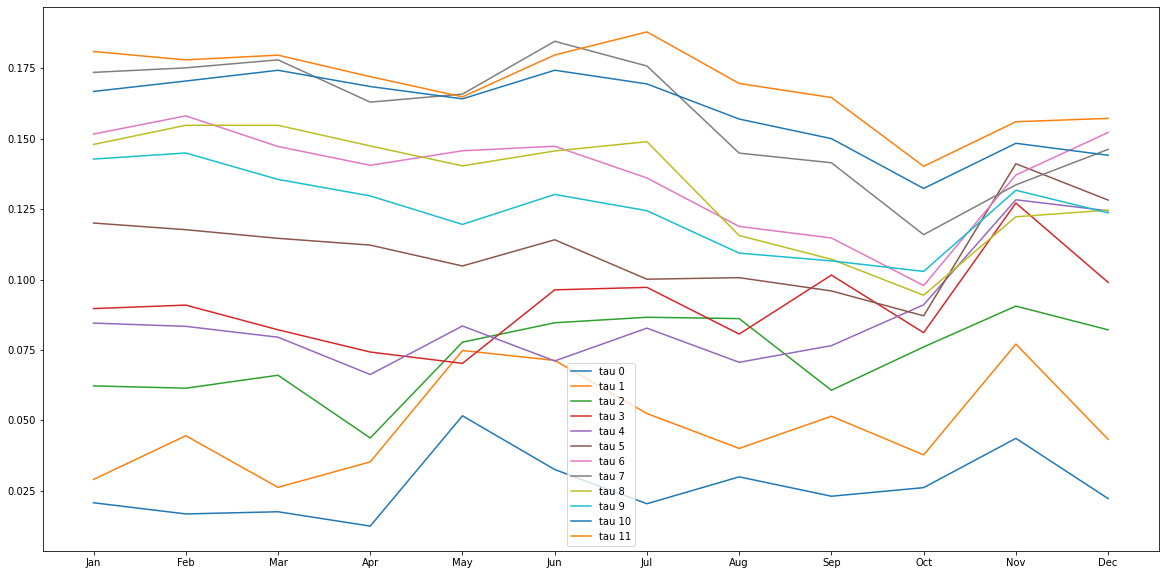

In [237]:
for i in range(12):
    plt.plot(cal_name,result[i,:], label = "tau {}".format(i))
    
plt.legend()

In [279]:
df

,drought,drought (t-12),drought (t-13),drought (t-14),drought (t-15),drought (t-16),drought (t-17),drought (t-18),drought (t-19),drought (t-20),...,1,2,3,4,5,6,7,8,9,10
23,83,10.0,10.0,10.0,10.0,13.0,18.0,24.0,39.0,45.0,...,-1.269163,-0.410859,-0.998658,1.291684,1.800589,0.777168,-0.454375,0.924431,0.629390,1.393483
24,57,28.0,10.0,10.0,10.0,10.0,13.0,18.0,24.0,39.0,...,-1.395151,0.182285,-1.269163,1.535786,1.915173,0.527426,-0.407445,-0.116665,0.358538,0.445176
25,33,37.0,28.0,10.0,10.0,10.0,10.0,13.0,18.0,24.0,...,-1.118925,0.141725,-1.395151,1.843875,1.416651,0.496822,-0.570195,-0.248554,-0.165409,0.570940
26,57,38.0,37.0,28.0,10.0,10.0,10.0,10.0,13.0,18.0,...,-0.976061,0.278156,-1.118925,1.726891,1.013101,0.129494,-0.769071,-0.103208,-1.616581,-0.186824
27,34,49.0,38.0,37.0,28.0,10.0,10.0,10.0,10.0,13.0,...,-1.335294,0.206039,-0.976061,1.297981,0.649570,0.615275,-0.832655,-0.118660,-0.749442,0.439301
28,31,92.0,49.0,38.0,37.0,28.0,10.0,10.0,10.0,10.0,...,-0.954238,-0.034180,-1.335294,1.004792,0.161753,0.311039,-0.562962,0.459398,-0.283567,0.338707
29,27,143.0,92.0,49.0,38.0,37.0,28.0,10.0,10.0,10.0,...,-0.816688,-0.382118,-0.954238,1.057343,0.787774,0.387867,-0.516401,0.976187,-0.172819,-0.089094
30,46,161.0,143.0,92.0,49.0,38.0,37.0,28.0,10.0,10.0,...,-0.831940,-0.801434,-0.816688,0.704011,0.809028,0.419341,-0.647409,0.730040,0.545731,-0.489037
31,70,166.0,161.0,143.0,92.0,49.0,38.0,37.0,28.0,10.0,...,-0.846602,-0.615289,-0.831940,0.568739,1.134431,0.144409,-0.449744,1.028740,1.184687,-0.727957
32,68,143.0,166.0,161.0,143.0,92.0,49.0,38.0,37.0,28.0,...,-0.411674,-0.552160,-0.846602,0.517385,1.155265,0.098955,-0.451751,1.191621,1.281880,-0.308361


In [277]:
df = pd.DataFrame({"drought":count})
lags = np.arange(start_lag,end_lag + 1)
df = df.assign(**{
'{} (t-{})'.format(col, t): df[col].shift(t)
for t in lags
for col in df
})
for k in range(len(link)):
    df_sst["pc"] = V[:,link[k,0]-1]
    df[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst)
    df[str(k)] = df[str(k)].shift(abs(link[k,1]))
df = df.dropna()

In [278]:
I = np.where(df.index%12 ==0)[0]

In [144]:
df.iloc[I,:]

,drought,drought (t-1),drought (t-2),drought (t-3),drought (t-4),drought (t-5),drought (t-6),drought (t-7),drought (t-8),drought (t-9),drought (t-10),drought (t-11),drought (t-12),0,1,2,3,4
12,2,3.0,2.0,2.0,2.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,1.0,0.460249,0.183126,-0.199901,-0.155861,-0.916351
24,69,31.0,8.0,6.0,7.0,7.0,5.0,5.0,5.0,4.0,8.0,22.0,2.0,0.346106,0.545731,-0.554859,-0.098243,0.378396
36,0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,8.0,2.0,7.0,69.0,0.688844,-1.050579,0.238394,-0.122088,0.580939
48,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.896273,0.759006,-0.357212,-0.176325,1.727971


In [135]:
pred = np.load("../../whole_data_results/ZW/pcmci_data/pred_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
test = np.load("../../whole_data_results/ZW/pcmci_data/test_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))

In [136]:
test[I]

array([22,  7,  0,  0])

In [137]:
pred[I]

array([ 4.35227167, 54.98211133,  0.87022507,  0.87022507])

In [138]:
mean_squared_error(test[I],pred[I])

653.8099765436167

In [139]:
result = []

In [140]:
for i in range(12):
    I = np.where(df.index%12 ==i)[0]
    result.append(mean_squared_error(test[I],pred[I]))

In [141]:
result

[388.7441082863103,
 653.8099765436167,
 87.96577886330324,
 11.750414334397949,
 18.506252353296457,
 2.3397673769772176,
 2.0209611333722988,
 2.5421380987681443,
 2.07436312813172,
 1.4762715801331088,
 3.4337819744368923,
 164.1119615034217]

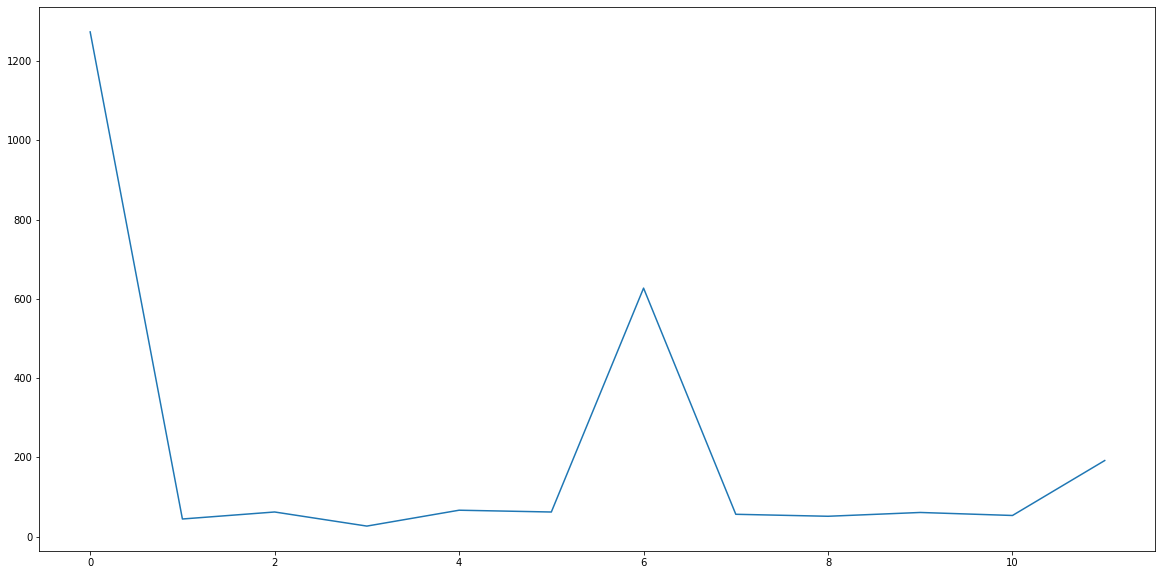

In [123]:
plt.plot(result)

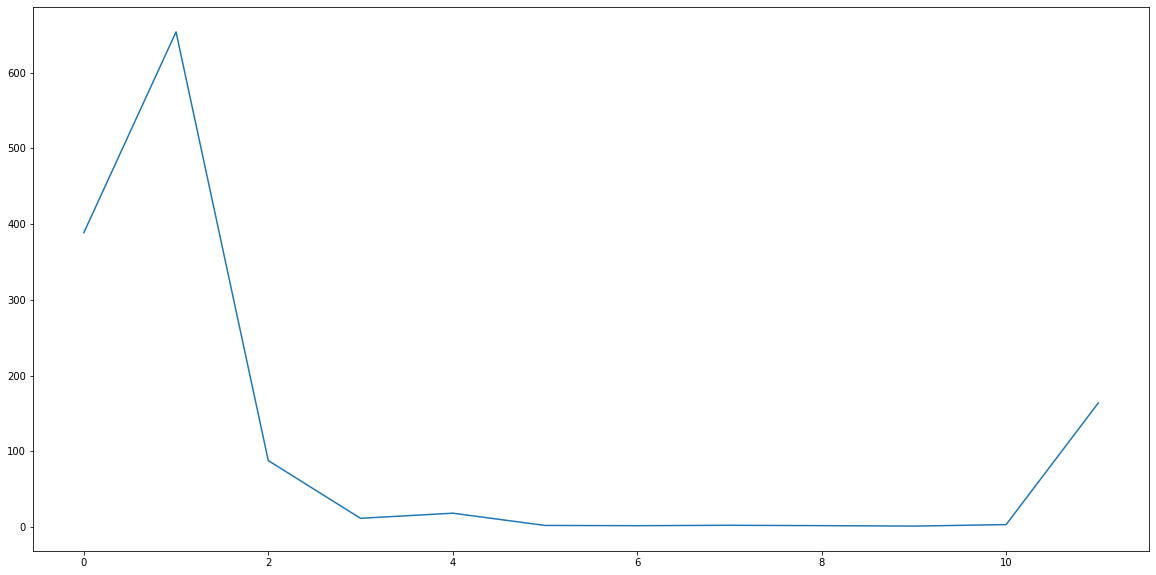

In [142]:
plt.plot(result)